# Import thư viện

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

# Tổng quan về tập dữ liệu

In [124]:
# Đọc dữ liệu
df = pd.read_csv("./data/bank-full.csv", sep=';')

# Xem qua thông tin
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (45211, 17)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [126]:
print("Danh sách các cột:\n", list(df.columns))
print("\n=================== Các giá trị unique ===================")

col = df["y"]
unique_vals = col.unique()

print(f"\n{unique_vals}")
print(f"Số lượng giá trị unique: ")

Danh sách các cột:
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

=================== Các giá trị unique ===================

['no' 'yes']
Số lượng giá trị unique: 


In [127]:
# Đếm số lượng từng giá trị
counts = df['y'].value_counts()
print("Số lượng từng giá trị:\n", counts)

# Tính tỷ số yes/no
ratio = counts['yes'] / counts['no']
print(f"Tỷ số yes/no: {ratio}")

Số lượng từng giá trị:
 y
no     39922
yes     5289
Name: count, dtype: int64
Tỷ số yes/no: 0.1324833425179099


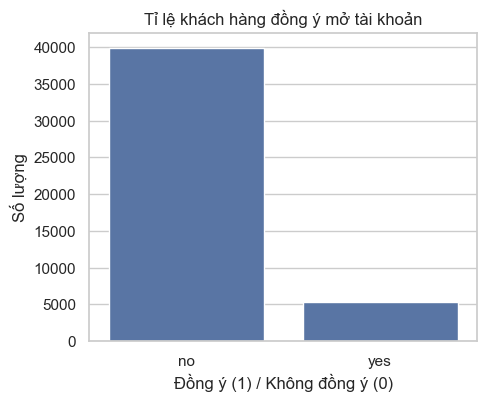

In [128]:
sns.set_theme(style="whitegrid")

# 1️⃣ Tỉ lệ khách hàng đồng ý mở tài khoản
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='y')
plt.title("Tỉ lệ khách hàng đồng ý mở tài khoản")
plt.xlabel("Đồng ý (1) / Không đồng ý (0)")
plt.ylabel("Số lượng")
plt.show()

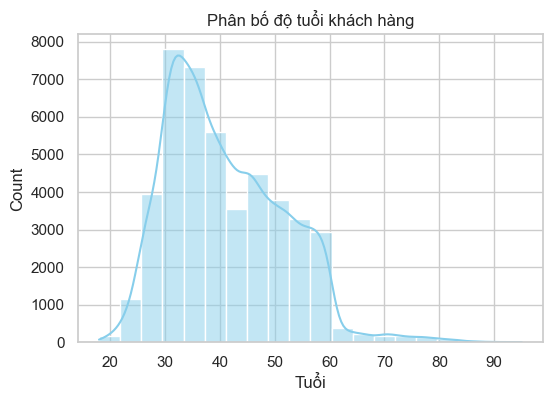

In [129]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Phân bố độ tuổi khách hàng")
plt.xlabel("Tuổi")
plt.show()

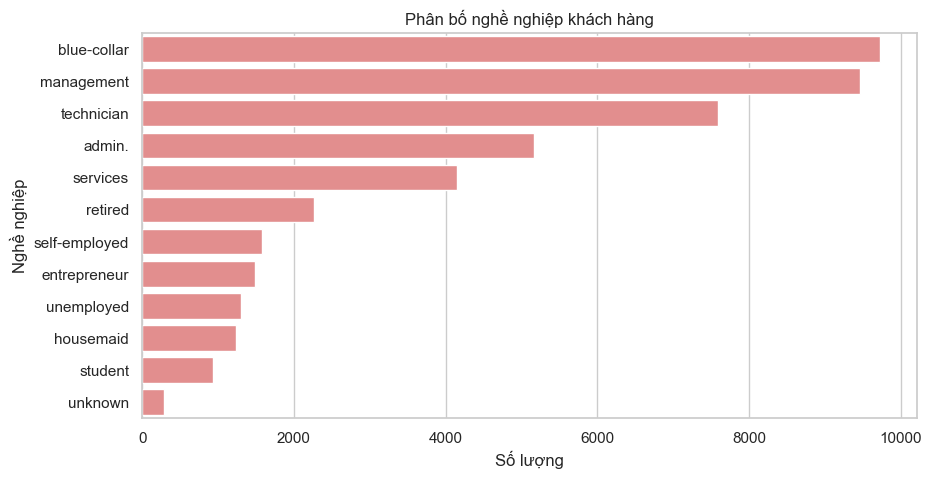

In [130]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='job', order=df['job'].value_counts().index, color='lightcoral')
plt.title("Phân bố nghề nghiệp khách hàng")
plt.xlabel("Số lượng")
plt.ylabel("Nghề nghiệp")
plt.show()

In [131]:
(df == 'unknown').sum().sort_values(ascending=False)

poutcome     36959
contact      13020
education     1857
job            288
age              0
default          0
balance          0
housing          0
marital          0
loan             0
day              0
duration         0
month            0
campaign         0
pdays            0
previous         0
y                0
dtype: int64

# Tiền xử lý dữ liệu

In [132]:
unknown_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in unknown_cols:
    df[col] = df[col].replace('unknown', 'Unknown')

In [133]:
df = df.drop(columns=['duration'])

In [134]:
binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'Unknown': -1})

In [135]:
cat_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Đã mã hóa các cột:", list(cat_cols))

Đã mã hóa các cột: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [136]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  poutcome   45211 non-null  int64
 15  y          45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,5,1,3,0,2143,1,0,2,5,8,1,-1,0,3,0
1,44,10,2,2,0,29,1,0,2,5,8,1,-1,0,3,0
2,33,3,1,2,0,2,1,1,2,5,8,1,-1,0,3,0
3,47,2,1,0,0,1506,1,0,2,5,8,1,-1,0,3,0
4,33,0,2,0,0,1,0,0,2,5,8,1,-1,0,3,0


In [137]:
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, " Test:", X_test.shape)
print("Tỷ lệ lớp (train):")
print(y_train.value_counts(normalize=True))

Train: (36168, 15)  Test: (9043, 15)
Tỷ lệ lớp (train):
y
0    0.883018
1    0.116982
Name: proportion, dtype: float64


Classification CART Results

Số mẫu dự đoán đúng: 7113/9043 (78.66%)

Confusion Matrix:
 [[6535 1450]
 [ 480  578]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87      7985
           1       0.29      0.55      0.37      1058

    accuracy                           0.79      9043
   macro avg       0.61      0.68      0.62      9043
weighted avg       0.86      0.79      0.81      9043



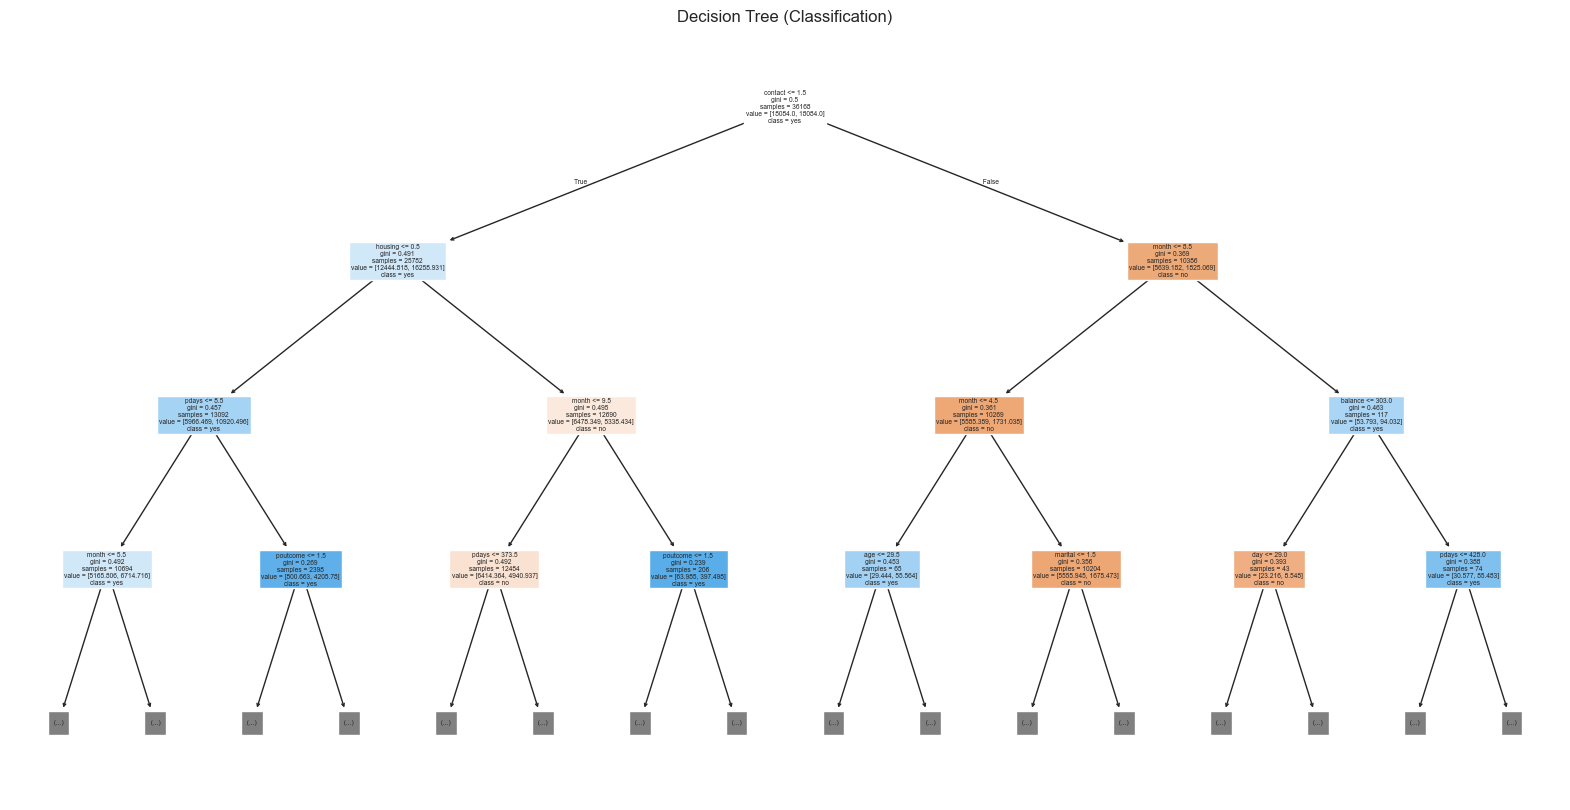

In [138]:
# Huấn luyện mô hình
cart_clf = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
cart_clf.fit(X_train, y_train)

# Dự đoán
y_pred = cart_clf.predict(X_test)

# Đánh giá
print("Classification CART Results")
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Tổng kết số đúng / tổng
n_correct = np.sum(y_pred == y_test)
n_total = len(y_test)

print(f"\nSố mẫu dự đoán đúng: {n_correct}/{n_total} ({acc*100:.2f}%)")

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Vẽ cây quyết định (rút gọn)
plt.figure(figsize=(20,10))
plot_tree(cart_clf, filled=True, feature_names=X.columns, class_names=['no','yes'], max_depth=3)
plt.title("Decision Tree (Classification)")
plt.show()


Regression CART Results
R² score: 0.14489343737321747
MAE: 0.17365631297049403
RMSE: 0.2972198994994435

✅ Số mẫu dự đoán đúng: 8073/9043 (89.27%)

Confusion Matrix:
 [[7867  118]
 [ 852  206]]


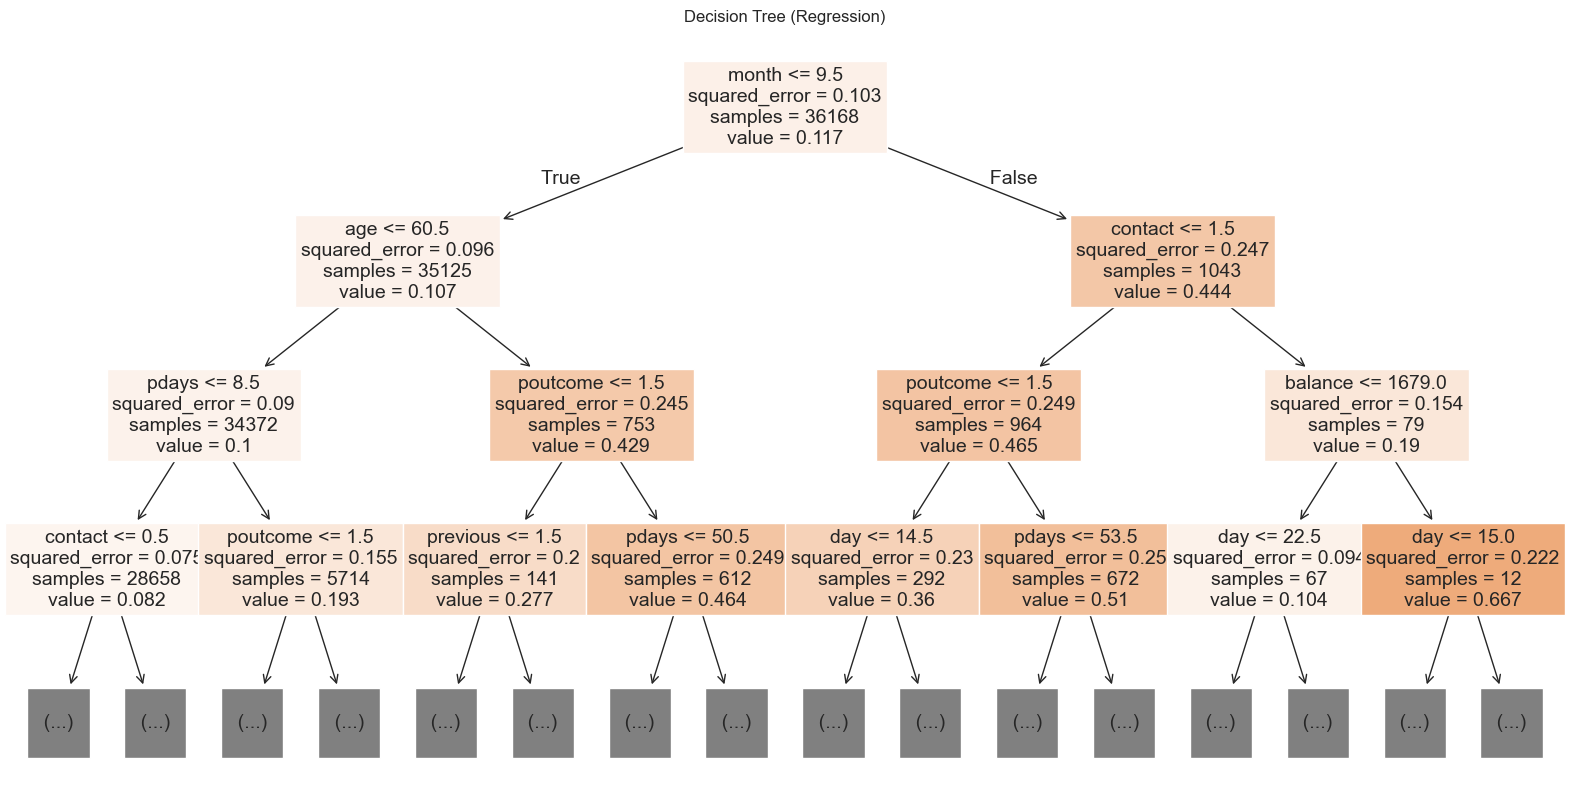

In [139]:
# Dùng y (0/1) như giá trị thực để regression
cart_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
cart_reg.fit(X_train, y_train)

# Dự đoán
y_pred_reg = cart_reg.predict(X_test)

# Đánh giá
print("Regression CART Results")
print("R² score:", r2_score(y_test, y_pred_reg))
print("MAE:", mean_absolute_error(y_test, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))

# Chuyển dự đoán regression về nhãn 0/1 với threshold 0.5
y_pred_class = (y_pred_reg >= 0.5).astype(int)

# Tính số lượng dự đoán đúng
n_correct = np.sum(y_pred_class == y_test)
n_total = len(y_test)
accuracy = n_correct / n_total

print(f"\n✅ Số mẫu dự đoán đúng: {n_correct}/{n_total} ({accuracy*100:.2f}%)")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:\n", cm)

# Vẽ cây quyết định (rút gọn)
plt.figure(figsize=(20,10))
plot_tree(cart_reg, filled=True, feature_names=X.columns, max_depth=3, fontsize=14)
plt.title("Decision Tree (Regression)")
plt.show()


In [140]:
y_pred_class = (y_pred_reg >= 0.5).astype(int)

print("Những giá trị dự đoán nhị phân đầu tiên:")
print(y_pred_class[:10])

Những giá trị dự đoán nhị phân đầu tiên:
[0 0 0 0 0 0 0 1 0 0]


In [141]:
import pandas as pd

comparison = pd.DataFrame({
    'Thực tế': y_test,
    'Dự đoán_regression': y_pred_reg,
    'Dự đoán_nhị phân': y_pred_class
})
print(comparison.head(10))

       Thực tế  Dự đoán_regression  Dự đoán_nhị phân
1392         0            0.039943                 0
7518         0            0.039943                 0
12007        0            0.039943                 0
5536         0            0.039943                 0
29816        0            0.091095                 0
18275        0            0.091095                 0
8543         0            0.039943                 0
43965        1            0.965517                 1
28083        0            0.091095                 0
25787        0            0.212404                 0


In [142]:
acc = accuracy_score(y_test, y_pred_class)
print(f"Accuracy (sau threshold 0.5): {acc:.4f}")

Accuracy (sau threshold 0.5): 0.8927
